# PROGETTO MACHINE LEARNING - LIFESTYLE

## INTRODUZIONE

In questo progetto si utilizzerà il toy database [diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) per predire il livello di progessione della malattia dopo un anno, a partire da 10 variabili misurate sui pazienti

## CARICAMENTO DATASET

Sono state importate le varie librerie python che potrebbero essere utilizzate nel progetto

In [54]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

Si fa il download del database diabetes

In [2]:
diabetes = load_diabetes()

Analizzo la descrizione che offre sklearn per il toy dataset

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Dalla descrizione è emerso che i dati sono stati normalizzati

Con questo comando, posso analizzare la grandezza del toy dataset (442) e il significato delle feature presenti nel toy dataset che sono 10 features più il target:
1. age: l'età
2. sex: sesso
3. bmi: indice di massa corporea
4. bp: pressione arteriosa media
5. s1: colestorolo totale
6. s2: lipoproteine a bassa densità
7. s3: lipoproteine ad alta densità
8. s4: colesterolo totale
9. s5: trigliceridi
10. s6: livello di zucchero nel sangue


viene utilizzato *pandas* per dare un primo sguardo ai dati presenti nel dataset

In [4]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [5]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Si verifica la presenza di valori nulli nel dataset:

In [6]:
diabetes_df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [7]:
diabetes_df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Dall'analisi è emerso che in questo dataset non è presente nessun dato mancante.

## DIVISIONE DEL DATASET

Per la divisione del dataset, Il 70% dei dati del dataset verrà utilizzo per il training e il 30% per il testing. 

Non è stato possibile utilizzare la stratificazione, o Stratified sampling tecnica di campionamento in cui la popolazione è suddivisa in sottogruppi detti *strati* in base a delle specifiche caratteristiche importanti che garantisce che tutti gli strati siano rappresentati proporzionalmente e genericamente in ogni campione finale, poichè il dataset in analisi non riguarda un problema di classificazione 


In [8]:
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

## VALIDAZIONE

Per questo progetto è stato scelto di utilizzare il **Random Forest** come modello di apprendimento. Il Random Forest è un tipo di ensemble method basato sul Decision Tree. 

Il **Decision Tree** un algoritmo di machine learning che opera mediante la costruzione di un albero di decisione, dove le scelte su quale percorso seguire vengono fatte in base ai valori soglia delle features nel dataset. In pratica, il Decision Tree può essere visualizzato come una serie di 'if' innestati, il che lo rende comprensibile anche per coloro che hanno familiarità con concetti informatici.

Perchè si chiama Random Forest?


Perchè è costituito da un insieme di alberi decisionali (Forest) ed è di tipo **Bagging** (Random), un tipo di ensemble method in cui avviene il campionamento casuale con sostituzione (nella statistica questa tecnica viene chiamata **bootstrap**, significa che i dati possono essere scelti più di una volta) dei dati di addestramento per creare dei sottoinsieme di dati e features diversi. E' una differenza fondamentale tra il Decision Tree e Random Forest. Mentre il Decision Tree considerano tutte le possibili suddivisioni delle caratteristiche, gli algoritmi Random Forest selezionano solo un sottoinsieme di queste caratteristiche.
Dopo il campionamento casuale, i modelli vengono addestrati in maniera indipendente ed effettuata la media o la maggioranza (in base se è un modello di regressione o classificazione) delle previsioni producendo una stima più precisa.
Un esempio pratico nella vita reale del random forest è d'immaginare quale videogioco di ruolo scegliere. invece di chiedere consiglio ad una sola persona (decision tree), si decide di chiedere l'opinione di diverse persone. Anzichè chiedere a tutte le persone che si conosce, si selezione un campionamento casuale di amici e parenti. Dopo aver preso tutti consigli, si fa una media delle raccomandazioni per poter ottenere una lista di videogiochi di ruolo.

Uno dei vantaggi principali del Random Forest rispetto al decision tree è la riduzione dell'overfitting.

Per questo progetto verrà utilizzato il *RandomForestRegressor* poichè il target è una variabile numerica continua. Ad esempio, se come target fosse stato la predizione di un email spam o no spam, clienti soddisfatti o non soddisfatti di un servizio di trasporto, si sarebbe scelto il *RandomForestClassifier*




- cosa sono gli iperparametri? fare un esempio pratico? (v)
- dovrebbero essere 3, spiegali intuitivamente (v)
- randomsearch?


Dopo aver selezionato il modello di apprendimento, è importante valutare le sue prestazioni modificando gli **iperparametri**. Gli **iperparametri** sono quei parametri che vengono impostati prima dell'addestramento di un modello e influenzano le sue prestazioni. Possiamo paragonarli alle specifiche iniziali di un'auto, come le sue dimensioni o la potenza del motore. Trovare i valori ottimali per questi parametri è fondamentale per ottenere risultati migliori.

Gli iperparametri che si andranno a valutare per il random forest sono:

1. *n_estimators*: definisce il numero di decision tree usati nel modello
2. *max_depth*: definisce la profondità massima tra la radice e la foglia
3. *min_sample_split*: definisce il minimo numero richiesto di osservazioni di un nodo per dividerlo. Un esempio: si considera un random forest in cui si vuole predire se una persona comprerà o meno un articolo basato su alcune caratteristiche. Si suppone che in un nodo dell'albero rappresenti delle persone di che hanno più di trent'anni. Se s'imposta il parametro a 10, significa che questo nodo verrà diviso solo se ci sono almeno 10 persone che abbiano più di trent'anni.
4. *max_leaf_nodes*: definisce il numero di foglie e quindi limita la crescita del decision tree
5. *min_samples_leaf*: definisce il numero minimo di osservazioni che devono essere presenti in un nodo dopo la divisione. Se dopo la divisione, non rispetta il numero minimo, la divisione non viene effettuata
6. *max_samples*: definisce la parte del dataset che viene assegnato ad ogni decision tree
7. *max_features*: definisce il numero di features che viene assegnato ad ogni decision tree

Questi iperparametri influenzano la complessità e le prestazioni del modello e devono essere regolati con cura per ottenere risultati ottimali

Per regolarli utilizzeremo la tecnica del RandomSearchCV.


Il **RandomizedSearchCV** è una tecnica utilizzata per la ricerca dei migliori iperparametri. È un metodo che esplora combinazioni casuali di iperparametri all'interno di intervalli specificati. Ciò consente alla ricerca randomizzata di esplorare in modo efficiente un insieme diversificato di combinazioni di iperparametri. Verrà utilizzato poiché si inserirà un ampio intervallo di valori per ogni iperparametro. Utilizzando invece il **GridSearchCV**, si spenderebbero più risorse poiché esegue tutte le possibili combinazioni dei valori degli iperparametri inseriti.

Si definiscono i valori per ogni iperparametro in un dizionario:

In [40]:
parameters = {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000)],
    'max_depth': np.logspace(-7, 3, 60),
    'min_samples_split': np.arange(2, 11, 1),
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': np.arange(1, 6, 1),
    'max_leaf_nodes': [int(x) for x in np.linspace(5, 100)],
    'max_samples': np.arange(0.1, 1.0, 0.1)
}

I parametri inseriti sono:
1. *n_estimators* è un array di 50 valori interi nell'intervallo da 100 a 2000.
2. *max_depth* è un array di 60 valori equamente distribuiti su una scala logaritmica compresa tra 10^-7 e 10^3.
3. *min_samples_split* è un array con valori interi in un intervallo da 1 a 10 con incrementi di 1.
4. *max_features* è un array con 2 valori: "auto" e "sqrt".
5. *min_samples_leaf* è un array con valori interi in un intervallo da 1 a 5 con incrementi di 1.
6. *max_leaf_nodes* è un array di 50 valori interi nell'intervallo da 5 a 100.
7. *max_samples* è un array con valori in un intervallo da 0.1 a 0.9 con incrementi di 0.1.

In [46]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, cv = 5, verbose=2, n_jobs = -1, n_iter = 100)

Nell' RandomizedSearchCV è stato inserito:
1. il modello RandomForestRegressor
2. i parametri impostati nel passo precedente
3. Cross validation con la divisione di 5 fold del dataset
4. 100 iterazioni che testeranno casualmente la ricerca dei migliori parametri

viene effettuato il training di dati con i dati inseriti nella classe gridsearchcv

In [50]:
rf_random.fit(X_train, y_train)
rf_random.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=0.6020894493336125, max_features=sqrt, max_leaf_nodes=82, max_samples=0.4, min_samples_leaf=1, min_samples_split=10, n_estimators=604; total time=   0.6s
[CV] END max_depth=0.6020894493336125, max_features=sqrt, max_leaf_nodes=82, max_samples=0.4, min_samples_leaf=1, min_samples_split=10, n_estimators=604; total time=   0.6s
[CV] END max_depth=0.6020894493336125, max_features=sqrt, max_leaf_nodes=82, max_samples=0.4, min_samples_leaf=1, min_samples_split=10, n_estimators=604; total time=   0.6s
[CV] END max_depth=0.0005355666917706897, max_features=sqrt, max_leaf_nodes=72, max_samples=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=720; total time=   0.7s
[CV] END max_depth=0.0005355666917706897, max_features=sqrt, max_leaf_nodes=72, max_samples=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=720; total time=   0.7s
[CV] END max_depth=0.0005355666917706897, max_features=sqrt, max_lea

RandomForestRegressor(max_depth=13.664483492953243, max_features='sqrt',
                      max_leaf_nodes=30, max_samples=0.8, min_samples_leaf=5,
                      min_samples_split=6, n_estimators=487)

sono stati ottenuti i migliori valori degli iperparametri:
- max_depth = 13.664483492953243 
- max_features = 'sqrt'
- max_leaf_nodes = 30 
- max_samples = 0.8 
- min_samples_leaf = 5
- min_samples_split = 6
- n_estimators = 487

Per fare ulteriori analisi si sceglierà di utilizzare la metrica **MAE**. Il MAE (**mean absolute error**) è una metrica che valuta la discrepanza tra il valore osservato e il valore predetto.

In [76]:
from sklearn.metrics import mean_absolute_error

predict = rf_random.predict(X_test)
mean_absolute_error(y_true=y_test, y_pred=predict)


45.926492860534125

Dal valore che è risultato (45.92) sembra ci sia discrepanza tra il valore predetto e il valore osservato. Questa discrepanza potrebbe indicare che il modello potrebbe sovrastimare o sottostimare il target. Per avere un idea più chiara se il modello sovrastima/sottostima il target, si crea un grafico in base a questi valori:
- la diagonale tratteggiata è creata dai valori osservati
- sull'asse delle X il valore osservato
- sull'asse delle Y il valore predetto

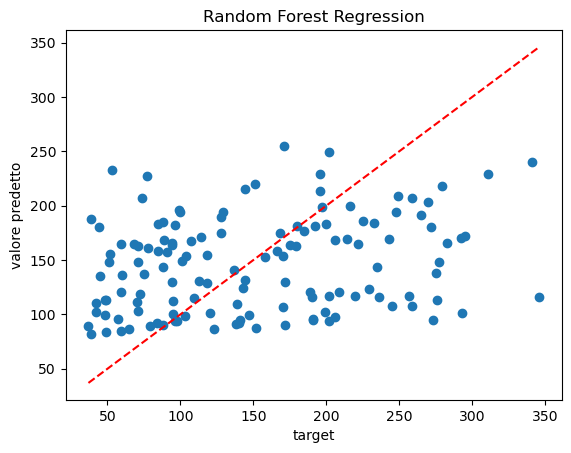

In [86]:
y_test_sort = np.sort(y_test)
plt.scatter(x=y_test_sort, y=predict)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label='Diagonale')
plt.title('Random Forest Regression')
plt.xlabel('target')
plt.ylabel('valore predetto')
plt.show() 

Nel grafico specifico fornito, possiamo notare che i punti dei dati sono sparsi intorno alla linea diagonale e sono lontani da essi. Questo suggerisce che le previsioni del modello non sono sempre perfette, quindi c'è una discrepanza tra il target e il valore predetto ma che esiste una correlazione positiva tra i valori previsti e i valori di verità.

Si analizza un'altra metrica R^2.
R^2 è la percentuale di variazione spiegata dalla relazione tra variabili, il valore è compreso tra 0 e 1:
- Se R^2 = 0 significa che il modello non spiega la variazione nei dati nella variabile dipendente utilizzando le variabili indipendenti
- Se R^2 = 1 siignifica che il modello spiega perfettamente la variazione nei dati della variabile dipendente utilizzando le variabili indipendenti

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, predict)

0.49209819032521507

R^2 rappresenta circa il 49% della variazione nei dati della variabile dipendente spiegata dalle variabili indipendenti. Si tratta di una variazione moderata, quindi le 10 variabili indipendenti potrebbero essere in parte non rilevanti o non influenzano significativamente la variabile dipendente.